In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import natsort

In [2]:
input = np.load('Data/data_reshaped/64/data_total.npy')

In [3]:
print(input.shape)

(322, 64, 64, 50)


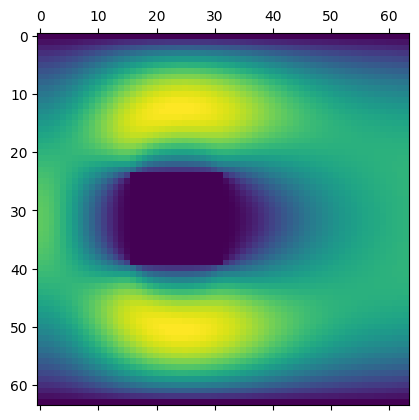

In [4]:
plt.matshow(input[0][:, :, 20])

In [5]:
np.linspace(1.13969697 , 7.0, 77)

array([1.13969697, 1.21680622, 1.29391547, 1.37102472, 1.44813397,
       1.52524322, 1.60235247, 1.67946172, 1.75657097, 1.83368022,
       1.91078947, 1.98789872, 2.06500797, 2.14211723, 2.21922648,
       2.29633573, 2.37344498, 2.45055423, 2.52766348, 2.60477273,
       2.68188198, 2.75899123, 2.83610048, 2.91320973, 2.99031898,
       3.06742823, 3.14453748, 3.22164673, 3.29875598, 3.37586523,
       3.45297448, 3.53008373, 3.60719298, 3.68430223, 3.76141148,
       3.83852073, 3.91562998, 3.99273923, 4.06984848, 4.14695774,
       4.22406699, 4.30117624, 4.37828549, 4.45539474, 4.53250399,
       4.60961324, 4.68672249, 4.76383174, 4.84094099, 4.91805024,
       4.99515949, 5.07226874, 5.14937799, 5.22648724, 5.30359649,
       5.38070574, 5.45781499, 5.53492424, 5.61203349, 5.68914274,
       5.76625199, 5.84336124, 5.92047049, 5.99757974, 6.074689  ,
       6.15179825, 6.2289075 , 6.30601675, 6.383126  , 6.46023525,
       6.5373445 , 6.61445375, 6.691563  , 6.76867225, 6.84578

In [6]:
np.linspace(3.39909091 , 7.0, 52)

array([3.39909091, 3.46969697, 3.54030303, 3.61090909, 3.68151515,
       3.75212121, 3.82272727, 3.89333333, 3.96393939, 4.03454546,
       4.10515152, 4.17575758, 4.24636364, 4.3169697 , 4.38757576,
       4.45818182, 4.52878788, 4.59939394, 4.67      , 4.74060606,
       4.81121212, 4.88181818, 4.95242424, 5.0230303 , 5.09363636,
       5.16424242, 5.23484849, 5.30545455, 5.37606061, 5.44666667,
       5.51727273, 5.58787879, 5.65848485, 5.72909091, 5.79969697,
       5.87030303, 5.94090909, 6.01151515, 6.08212121, 6.15272727,
       6.22333333, 6.29393939, 6.36454545, 6.43515152, 6.50575758,
       6.57636364, 6.6469697 , 6.71757576, 6.78818182, 6.85878788,
       6.92939394, 7.        ])

In [7]:
def create_matrices(directory):
    data = []
    files = natsort.natsorted(os.listdir(directory))
    for i in files:
        if i.split('_')[1] == 'checkpoints':
            pass
        else:
            a = np.empty((64, 64, 2))
            # print(i.split('_')[1])
            rows= np.linspace(100*float(i.split('_')[1]), float(i.split('_')[3][:-4]), a.shape[1])
            data1 = np.load(directory + '/' + i)
            a[:, :, 1] = data1[:, :, -1]
            for j in range(a.shape[0]):
                a[j, :, 0] = np.ones(a.shape[1])*rows[j]
            data.append(a)
    return np.array(data)

In [8]:
def create_matrices2(directory):
    data = []
    files = natsort.natsorted(os.listdir(directory))
    for i in files:
        if i.split('_')[1] == 'checkpoints':
            pass
        else:
            a = np.empty((64, 64, 2))
            rand = np.random.normal(float(i.split('_')[3][:-4]), scale = 0.01)
#             print(i.split('_')[3][:-4])
            a[:, :, 0] = np.ones((a.shape[0], a.shape[1]))*rand
            a[:, :, 1] = np.load(directory + '/' + i)[:, :, -1]
            data.append(a)
    return np.array(data)

In [9]:
data2 = create_matrices2('Data/much_data')
# np.save('Data/temps_train.npy', data2)
print(data2.shape)
# print(data2[0, :, :, 0])
# plt.matshow(data2[100, :, :, 0])

(13720, 64, 64, 2)


In [10]:
data = create_matrices('Data/much_data')
data_old = np.load('Data/2D_altered.npy')
print(data.shape)
print(data_old.shape)
print(data_old[0, 0, 0, 0])
for i in range (data_old.shape[0]):
    rows= np.linspace(100*data_old[i, 0, 0, 0], data_old[i, -1, -1, 0], 64)
    for j in range(len(rows)):
        data_old[i, j, :, 0] = np.ones(64)*rows[j]

(13720, 64, 64, 2)
(400, 64, 64, 2)
0.01


In [11]:
print(data_old[0, 0, 0, 0])

1.0


In [12]:
data_total = np.vstack((data, data_old))
# print(data_total.shape)
print(data[-1, 0, 0, 0])
print(data[-1, -1, -1, 0])
print(data_old[1, 0, 0, 0])
print(data_old[1, -1, -1, 0])
print(data_total[10000, 0, 0, 0])
print(data_total[-1, -1, -1, 0])
data_total = data_total[::-1]
print(data_total[-399, 0, 0, 0])
np.save('Data/2D_much.npy', data_total)
print(data_total.shape)

-500.0
100.0
1.0
246.05263157894737
143.14285714285714
265.0
3.01010101010101
(14120, 64, 64, 2)


In [13]:
# plt.matshow(data_total[-1, :, :, 1])